### Credit
The exercise is based on material by Henrik Pedersen for the course _Deep Learning for Visual Recognition_.
https://kursuskatalog.au.dk/da/course/93556/Deep-Learning-for-Visual-Recognition


---



Ecercise# Lab 4
In this exercise, you will explore tools that will help you train your own neural networks.

[link text](https://)## 1. Download the CIFAR 10 dataset and set up dataloaders
We will be using the CIFAR 10 dataset.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

mean = 0.5
std = 0.5
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((mean, mean, mean), (std, std, std))])

# Batch size
bs = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs,
                                          shuffle=True, num_workers=2,drop_last=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs,
                                         shuffle=False, num_workers=2,drop_last=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using cuda device
Files already downloaded and verified
Files already downloaded and verified


Display some stats

num_train 49984
num_test 9984
images.shape torch.Size([64, 3, 32, 32])


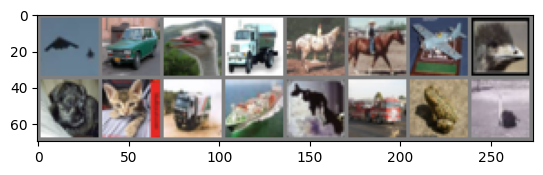

plane   car  bird truck horse horse plane  bird   dog   cat truck  ship   cat truck  frog  bird


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    npimg = img.numpy() / 2 + 0.5 # Un-normalize
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Number of samples
num_train = bs * len(trainloader)
num_test = bs * len(testloader)
print('num_train',num_train)
print('num_test',num_test)

# Get a batch of some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print('images.shape',images.shape)

# show 16 images and print labels
imshow(torchvision.utils.make_grid(images[0:16]))
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

## Setting up device

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:',device)

Device: cuda


## 2.  Setting up your CNN
### **You can skip 2.1, 2.2, 2.4, and 2.6, if you feel comfortable with PyTorch and these layer types.**

Here, we will set up our own CNN. For this purpose we will need the following layer types:

- [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
- [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
- [BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d)
- [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
- [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)
- [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear])

as well as the reshape operation (called `view` in PyTorch):

- [view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view)

See complete overview of the basic building block for graphs [here](https://pytorch.org/docs/stable/nn.html).

In [5]:
# First import what we need
import torch.nn as nn
import torch.nn.functional as F

### 2.1 Conv2d
Reference to documentation: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

In [6]:
# Print shape of input
print('Input dimensions are (batch_size, channels, height, width)')
print('images.shape',images.shape)

# Perform convolution
conv = nn.Conv2d(3, 6, 5)
x = conv(images)

# Print shape of output
print('x.shape',x.shape)

# Print parameter shapes
for name, param in conv.named_parameters(): print('parameter',name,param.shape)

Input dimensions are (batch_size, channels, height, width)
images.shape torch.Size([64, 3, 32, 32])
x.shape torch.Size([64, 6, 28, 28])
parameter weight torch.Size([6, 3, 5, 5])
parameter bias torch.Size([6])


#### 2.1.1 Questions
1. What do each of the parameters (3, 6, 5) mean?
2. Recall the formula to calculate the output size of a convolution:

 `output_size = (input_size - kernel_size) / stride + 1`

 Is this formula satisfied in the above example?

3. How could you make the output (x) have the same width and height as the input (images)? (Think "padding"...)
4. If the convolution operation performed above was a layer in a CNN, what would the number of parameters of that layer be?

In [7]:
# Code for question 2: Padding
conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=2)
x = conv(images)

# Width and height are the same
print('x.shape',x.shape)
print('images.shape',images.shape)

x.shape torch.Size([64, 6, 32, 32])
images.shape torch.Size([64, 3, 32, 32])


### 2.2 MaxPool2d
Reference to documentation: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

In [8]:
# Random input - dimensions are (batch_size, channels, height, width)
x = torch.randn(64,6,28,28)

# Perform max pool
pool = nn.MaxPool2d(2, 2)
y = pool(x)
print('y.shape',y.shape)

# Print some elements
print('x[0,0,0:4,0:4]:\n',x[0,0,0:4,0:4])
print('y[0,0,0:2,0:2]:\n',y[0,0,0:2,0:2])

y.shape torch.Size([64, 6, 14, 14])
x[0,0,0:4,0:4]:
 tensor([[-1.3175,  1.6009, -1.2660,  0.1475],
        [ 0.6441, -0.0728, -0.6231,  0.6390],
        [ 1.0938, -0.7579, -0.6659, -0.8884],
        [-1.9236,  0.3327,  2.3440,  0.4186]])
y[0,0,0:2,0:2]:
 tensor([[1.6009, 0.6390],
        [1.0938, 2.3440]])


#### 2.2.1 Questions
1. What does MaxPool2d do? (Explain the output `y[0,0,0:2,0:2]` and compare to `x[0,0,0:2,0:2]`)
2. What do each of the parameters (2, 2) mean?

### 2.3 BatchNorm2d
Reference to documentation: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d

In [10]:
# Random input - dimensions are (batch_size, channels, height, width)
x = torch.randn(64,6,28,28)*10 + 2
print('x.mean',x.mean())
print('x.std',x.std())

# Perform batch normalization
bn = nn.BatchNorm2d(6)
y = bn(x)
print('y.mean',y.mean())
print('y.std',y.std())

# Print parameter shapes
for name, param in bn.named_parameters(): print('parameter',name,param.shape)

x.mean tensor(1.9515)
x.std tensor(10.0052)
y.mean tensor(1.9260e-09, grad_fn=<MeanBackward0>)
y.std tensor(1.0000, grad_fn=<StdBackward0>)
parameter weight torch.Size([6])
parameter bias torch.Size([6])


#### 2.3.1 Questions
1. What does BacthNorm2D do?
2. What does the input parameter (6) mean?
3. Is the mean and standard deviation after batch normalization as expected?
4. How many parameters does BatchNorm2D have? Why?

### 2.4 ReLU
Reference to documentation: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

In [11]:
# Random input - dimensions are (batch_size, channels, height, width)
x = torch.randn(64,6,28,28)
print('x.min',x.min())
print('x.max',x.max())
print('x[0,0,0:4,0:4]:\n',x[0,0,0:4,0:4])

# Apply ReLU
y = F.relu(x)
print('y.min',y.min())
print('y.max',y.max())
print('y[0,0,0:4,0:4]:\n',y[0,0,0:4,0:4])

x.min tensor(-4.4663)
x.max tensor(4.5218)
x[0,0,0:4,0:4]:
 tensor([[ 0.0950,  0.7019,  0.0108, -0.3953],
        [-0.0559, -1.7397,  0.8862,  0.5105],
        [-0.9233, -0.0425,  0.5787, -1.7733],
        [ 0.3923,  0.9674,  0.3395,  0.5298]])
y.min tensor(0.)
y.max tensor(4.5218)
y[0,0,0:4,0:4]:
 tensor([[0.0950, 0.7019, 0.0108, 0.0000],
        [0.0000, 0.0000, 0.8862, 0.5105],
        [0.0000, 0.0000, 0.5787, 0.0000],
        [0.3923, 0.9674, 0.3395, 0.5298]])


#### 2.4.1 Question
1. What does ReLU do? (Explain the output `y[0,0,0:4,0:4]` and compare to `x[0,0,0:4,0:4]`)

### 2.5 Linear and view
Reference to documentation:
- https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
- https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view

(Last week you used the `Flatten`-layer, but PyTorch comes with another layer type called `view`, which can also reshape layers into a vector. However, instead of copying data as `Flatten` does, the `view` layers points back to the original data and is, therefore, more memory efficient.)


Recall that CNNs for classification are divided into two blocks:

1. **Convolutional base (encoder):** A sequence of convolutional layers resulting in a feature map that you may think of as a multi-dimensional image with a certain width, height, and depth (number of channels).
2. **Fully connected layers (decoder):** One or more fully connected layers ending with a classifier.

The input to the decoder has to be a vector with the correct dimensions. Thus, our task is to convert the feature map into a vector. In the code below we wish to take the feature map `x`, vectorize it, and feed it through a fully connected layer to produce 10-dimensional output.

Your task is to figure out, what value `N` should have (see helper questions below):

In [16]:
# Random input - dimensions are (batch_size, channels, height, width)
x = torch.randn(64,6,28,28)

N = 6*28*28 # YOUR ANSWER HERE

# Vectorize
y = x.view(-1, N)
print('y.shape',y.shape)

# Fully connected layer
fc = nn.Linear(N,10)
z = fc(y)
print('z.shape',z.shape)

y.shape torch.Size([64, 4704])
z.shape torch.Size([64, 10])


The correct output shape (of z) is [64, 10], where 64 is the batch size and 10 is the dimensionality we want in the output side of the fully connected layer.

#### 2.5.1 Helper questions
1. What does `view` do?
2. What does `Linear` do?


## 2.6 Dropout
Reference to documentation: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout

Dropout is normally used only in relation to fully connected layers (i.e., not convolutional layers). The example below demonstrates the effect of the Dropout layer:

In [17]:
# Random input - dimensions are (batch_size, num_in_features)
x = torch.randn(64,10)
print('x[0,:]',x[0,:])

drop = nn.Dropout(p=0.5)
y = drop(x)
print('y[0,:]',y[0,:])

print('ratios',y[0,:]/x[0,:])

x[0,:] tensor([ 0.7060,  0.2785,  0.4110, -1.5371, -1.0933, -0.8706,  0.3638,  0.0638,
         1.9966,  0.4008])
y[0,:] tensor([ 1.4121,  0.0000,  0.0000, -0.0000, -2.1867, -1.7413,  0.0000,  0.0000,
         0.0000,  0.0000])
ratios tensor([2., 0., 0., 0., 2., 2., 0., 0., 0., 0.])


**IMPORTANT NOTE:** If necessary, re-run the code block until the printed part of `y[0,:]` contains both zeros and non-zeroes.

#### 2.6.1 Questions
1. Explain why there are zeroes in `y`.
2. Ratios: Why are the values of the non-zero entries of `y` twice as large as the corresponding values of the input `x`?
3. What happens to the ratios if you set `p=0.75`?

In [18]:
# Setting p = 0.75, the ratio become 4
drop = nn.Dropout(p=0.75)
y = drop(x)
print('ratios',y[0,:]/x[0,:])

ratios tensor([0., 0., 0., 0., 0., 4., 0., 0., 4., 0.])


## 2.7 Setting up the model
Your task is to fill in the blanks (???) below.

Hint: You can insert print statements in the `forward` function, which is executed when calling `scores = model(images)`.

In [22]:
#input dimensions are (batch_size, channels, height, width)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(num_features=6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.drop = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)
        # print(x.shape)
        x = x.view(-1, 16*5*5)
        x = self.drop(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = Net()

print('Network architecture:\n')
print(model)

# Print parameter shapes
print('Network parameters:\n')
for name, param in model.named_parameters(): print('parameter',name,param.shape)

# Test model
scores = model(images)
print(scores.shape)

Network architecture:

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)
Network parameters:

parameter conv1.weight torch.Size([6, 3, 5, 5])
parameter conv1.bias torch.Size([6])
parameter bn1.weight torch.Size([6])
parameter bn1.bias torch.Size([6])
parameter conv2.weight torch.Size([16, 6, 5, 5])
parameter conv2.bias torch.Size([16])
parameter bn2.weight torch.Size([16])
parameter bn2.bias torch.Size([16])
parameter fc1.weight torch.Size([120, 400])
parameter fc1.bias torch.Size([120])
parame

## 3. Training the model
In this task, just run the code, observe what happens and do your best to understand it.

In [21]:
# First import what we need
import torch.nn as nn
import torch.nn.functional as F

### 3.1 Setting up the CNN model
First, lets set up a simple CNN with 2 convolutional layers, followed by two fully connected layers. The network is equivalent to the network defined above in Task 1. Each convolution operation is followed by batch normalization, ReLU, and max pooling (Note that instead of max pooling we could also have applied convolution with a stride of 2 to achieve the same level of down-sizing). The self-made Lambda layer helps us reshape the output of the last conv layer to a vector, because PyTorch has no built-in reshape layer. We perform dropout on this vector with p = 0.5, before applying the two fully connected layers.

In [23]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def Net():
  net = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
      nn.BatchNorm2d(num_features=6),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
      nn.BatchNorm2d(num_features=16),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      Lambda(lambda x: x.view(x.size(0), -1)), # Vectorize
      nn.Dropout(p=0.5),
      nn.Linear(in_features=16*5*5,out_features=120),
      nn.ReLU(),
      nn.Linear(in_features=120, out_features=10)
  )
  return net

model = Net()

print('Network parameters:\n')
print(model)

# Print parameter shapes
for name, param in model.named_parameters(): print('parameter',name,param.shape)

Network parameters:

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Lambda()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=400, out_features=120, bias=True)
  (11): ReLU()
  (12): Linear(in_features=120, out_features=10, bias=True)
)
parameter 0.weight torch.Size([6, 3, 5, 5])
parameter 0.bias torch.Size([6])
parameter 1.weight torch.Size([6])
parameter 1.bias torch.Size([6])
parameter 4.weight torch.Size([16, 6, 5, 5])
parameter 4.bias torch.Size([16])
parameter 5.weight torch.Size([16])
parameter 5.bias torch.Size([16])
parame

Here is a useful function that you can call to re-initialize the weights/parameters of the model:

In [24]:
def reset_parameters(net):
    '''Init layer parameters.'''
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            torch.nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                torch.nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            torch.nn.init.constant_(m.weight, 1) # Why 1?
            torch.nn.init.constant_(m.bias, 0) # Why 0?
        elif isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                torch.nn.init.constant_(m.bias, 0)

reset_parameters(model)

### 3.2 Testing the model
Let's test the model:

In [25]:
# Move data to GPU
images = images.to(device)
labels = labels.to(device)

# Calculate scores
model = Net().to(device)
scores = model(images)  # predictions

print(scores.shape)

torch.Size([64, 10])


### 3.3 Calculating the accuracy
The scores (logits) don't have any meaningful interpretation, but we can convert them into class probabilities using softmax. Since we are only going to be interested in the model's accuracy, we will wrap the softmax inside function accuracy that calculates the accuracy on a batch:

In [26]:
def accuracy(scores, yb):
    score2prob = nn.Softmax(dim=1)
    preds = torch.argmax(score2prob(scores), dim=1)
    return (preds == yb).float().mean()

print('Accuracy', accuracy(scores,labels))

Accuracy tensor(0.0938, device='cuda:0')


### 3.4 Calculating the loss
I order to train your model, we also need a loss function. We will use the cross entropy loss already provided in PyTorch:

In [27]:
loss_func = F.cross_entropy
loss = loss_func(scores, labels)
print('Loss', loss)

Loss tensor(2.3902, device='cuda:0', grad_fn=<NllLossBackward0>)


### 3.5 Training function (fit)
The code below can be used to train a model and monitor important stats as training progresses. The training is carried out by calling the `fit` function, which takes any model as input.

You can change the optimizer by replacing `base_optimizer` with your own function handle.

The function `base_lr_scheduler` is a learning rate scheduler that updates the learning rate of the optimizer during training. The dummy-implementation does nothing, but you can modify it to implement your own learning rate scheduler. The inputs are
- `T` : Total number of batches
- `t` : Current batch index (max(t) = T)
- `lr` : Current learning rate

Other parameters to `fit` are:
- `bs` the batch size
- `epochs` the number of epochs
- `batches_per_epoch` the number of batches per epoch. If set to `None`, all images in the dataset are used, but still processed in batches.

Note that you can use `batches_per_epoch` to reduce the size of the training set. The effective size of the training set is `bs*batches_per_epoch`.

In [28]:
from torch import optim

# Function handle that returns an optimizer
def base_optimizer(model,lr=0.001, momentum=0.9):
    return optim.SGD(model.parameters(), lr=lr,momentum=momentum)

# Function handle that updates the learning rate
# (note this is a dummy implementation that does nothing)
def base_lr_scheduler(t,T,lr):
  return lr

# Function to fit a model
def fit(model,
        opt_func=base_optimizer,
        lr_scheduler=base_lr_scheduler,
        bs=256,
        epochs=1,
        batches_per_epoch=None, # Default: Use entire training set
        show_summary=True):

  # Set up data loaders
  if batches_per_epoch == None:
    # Use all images
    train_dl = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=2)
    valid_dl = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False, num_workers=2)
    batches_per_epoch = len(train_dl)

  else:
    # Only use a subset of the data
    subset_indices = list(range(batches_per_epoch*bs))
    train_dl = torch.utils.data.DataLoader(trainset, batch_size=bs, sampler=torch.utils.data.sampler.SubsetRandomSampler(subset_indices), num_workers=2)

    # Use one fourth for validation
    subset_indices = list(range(int(np.ceil(batches_per_epoch/4))*bs))
    valid_dl = torch.utils.data.DataLoader(testset, batch_size=bs, sampler=torch.utils.data.sampler.SubsetRandomSampler(subset_indices), num_workers=2)

  # Initialize optimizer
  opt = opt_func(model)

  # For book keeping
  train_loss_history = []
  valid_loss_history = []
  plot_time_train = []
  plot_time_valid = []

  # Index of current batch
  t = 1

  # Total number of batches
  T = batches_per_epoch * epochs

  print('Epochs:',epochs,'Batches per epoch:',batches_per_epoch,'Total number of batches',T)

  # Get initial validation loss and accuracy
  model.eval()
  with torch.no_grad():
    valid_acc = sum(accuracy(model(xb.to(device)), yb.to(device)) for xb, yb in valid_dl) / len(valid_dl)
    valid_loss = sum(loss_func(model(xb.to(device)), yb.to(device)) for xb, yb in valid_dl) / len(valid_dl)
    valid_loss_history.append(valid_loss)
    plot_time_valid.append(t)


  # Train
  for epoch in range(epochs):
    model.train() # Train mode
    for xb, yb in train_dl:

      # Update learning rate
      opt.param_groups[0]['lr'] = lr_scheduler(t,T,lr=opt.param_groups[0]['lr'])

      # Forward prop
      pred = model(xb.to(device))
      loss = loss_func(pred, yb.to(device))

      # Book keeping
      train_loss_history.append(loss.detach().cpu().numpy())
      plot_time_train.append(t)
      t += 1

      # Backward prop (calculate gradient)
      loss.backward()

      # Update model parameters
      opt.step()
      opt.zero_grad()

      # Validation loss and accuracy
      if t % 10 == 0:    # print every 10 mini-batches
        model.eval() # Test mode
        with torch.no_grad():
            valid_acc = sum(accuracy(model(xb.to(device)), yb.to(device)) for xb, yb in valid_dl) / len(valid_dl)
            valid_loss = sum(loss_func(model(xb.to(device)), yb.to(device)) for xb, yb in valid_dl) / len(valid_dl)
            valid_loss_history.append(valid_loss)
            plot_time_valid.append(t-1)
            print('t',t,'lr',opt.param_groups[0]['lr'],'train loss',loss.detach().cpu().numpy(), 'val loss',valid_loss.detach().cpu().numpy(),'val accuracy', valid_acc.detach().cpu().numpy())
        model.train() # Back to train mode



  # Summary
  if show_summary:
    plt.figure()
    lines = []
    labels = []
    l, = plt.plot(plot_time_train,train_loss_history)
    lines.append(l)
    labels.append('Training')
    l, = plt.plot(plot_time_valid,[x.cpu() for x in valid_loss_history])
    lines.append(l)
    labels.append('Validation')
    plt.title('Loss')
    plt.legend(lines, labels, loc=(1, 0), prop=dict(size=14))
    plt.show()

  return train_loss_history

### 3.6 Train the model
Train the model and inspect the loss curves.

Epochs: 1 Batches per epoch: 196 Total number of batches 196
t 10 lr 0.001 train loss 3.4255514 val loss 2.64803 val accuracy 0.09091797
t 20 lr 0.001 train loss 3.0643218 val loss 2.5254345 val accuracy 0.10683594
t 30 lr 0.001 train loss 2.9837227 val loss 2.4820478 val accuracy 0.1234375
t 40 lr 0.001 train loss 2.6469743 val loss 2.407679 val accuracy 0.13671875
t 50 lr 0.001 train loss 2.5977604 val loss 2.3419225 val accuracy 0.15361328
t 60 lr 0.001 train loss 2.670112 val loss 2.2933834 val accuracy 0.16533203
t 70 lr 0.001 train loss 2.6194265 val loss 2.256582 val accuracy 0.18173829
t 80 lr 0.001 train loss 2.467626 val loss 2.2271192 val accuracy 0.19394532
t 90 lr 0.001 train loss 2.52761 val loss 2.2011354 val accuracy 0.20488282
t 100 lr 0.001 train loss 2.3849223 val loss 2.177399 val accuracy 0.21142578
t 110 lr 0.001 train loss 2.3982656 val loss 2.153906 val accuracy 0.21904297
t 120 lr 0.001 train loss 2.3572683 val loss 2.1306102 val accuracy 0.22773437
t 130 lr 0.

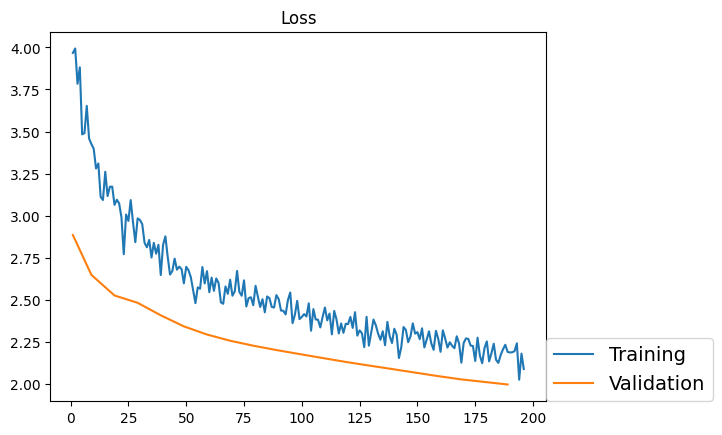

In [29]:
# Re-initialize weights
reset_parameters(model)

# Train with defaul settings.
train_loss_history = fit(model)

**Note:** The validation loss (on the unseen data) is overall *lower* than the training loss. This might initially seem like an unexpected behaviour, but it results from the fact that we use 50% Dropout during training, meaning that half of the weights of the fully connected layers are not used during training. When evaluating the model on the validation set, Dropout is disabled, and all weights are used. This leads to a better prediction (i.e., a lower loss) on the validation set.

### 3.7 Performing quick experiments on reduced dataset
When searching for hyperparameters it is often useful to perform quick experiments on only a small subset of the data. You can do this by decreasing the batch size and setting `batches_per_epoch` to say 20. The effective size of the training set is then `bs*batches_per_epoch` (say `128*20 = 2,560`), and the total number of batches being processed during training is `bs*batches_per_epoch*epochs` (say `128*20*5 = 51200`).


Epochs: 5 Batches per epoch: 20 Total number of batches 100
t 10 lr 0.001 train loss 3.6571836 val loss 2.6788576 val accuracy 0.09375
t 20 lr 0.001 train loss 2.9555626 val loss 2.382173 val accuracy 0.175
t 30 lr 0.001 train loss 2.6620412 val loss 2.2994068 val accuracy 0.20937501
t 40 lr 0.001 train loss 2.703294 val loss 2.2541072 val accuracy 0.21718751
t 50 lr 0.001 train loss 2.5169601 val loss 2.1698024 val accuracy 0.2296875
t 60 lr 0.001 train loss 2.5672674 val loss 2.0911186 val accuracy 0.2390625
t 70 lr 0.001 train loss 2.503815 val loss 2.049545 val accuracy 0.24062501
t 80 lr 0.001 train loss 2.1846495 val loss 2.03241 val accuracy 0.24843751
t 90 lr 0.001 train loss 2.3463438 val loss 2.0104468 val accuracy 0.25
t 100 lr 0.001 train loss 2.1397617 val loss 2.0002272 val accuracy 0.25


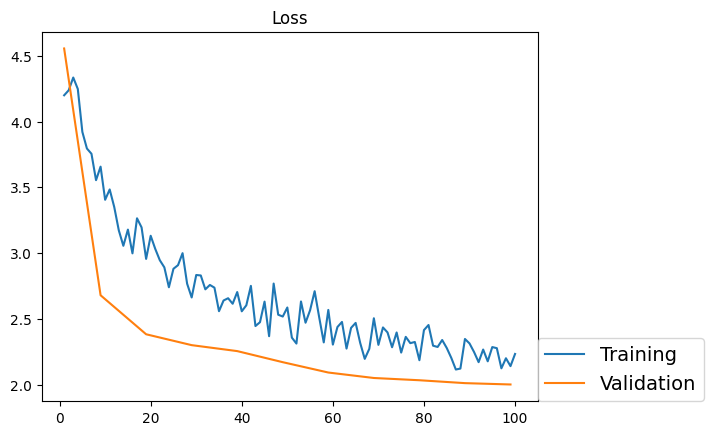

In [30]:
# Re-initialize weights
reset_parameters(model)

# Example: Train on small subset
train_loss_history = fit(model,bs=128,epochs=5,batches_per_epoch=20)

### 3.7 Train with custom optimizer
Fell free to experiment with these optimizers.

Epochs: 5 Batches per epoch: 20 Total number of batches 100
t 10 lr 0.1 train loss 2.3208034 val loss 2.2842853 val accuracy 0.1734375
t 20 lr 0.1 train loss 2.1842203 val loss 2.1631362 val accuracy 0.1734375
t 30 lr 0.1 train loss 2.1809208 val loss 2.0952473 val accuracy 0.24375
t 40 lr 0.1 train loss 2.1268723 val loss 2.038161 val accuracy 0.26875
t 50 lr 0.1 train loss 2.0992982 val loss 1.9905481 val accuracy 0.275
t 60 lr 0.1 train loss 1.9972928 val loss 1.9634249 val accuracy 0.3
t 70 lr 0.1 train loss 2.006761 val loss 1.9201163 val accuracy 0.30937502
t 80 lr 0.1 train loss 1.968505 val loss 1.901277 val accuracy 0.29375002
t 90 lr 0.1 train loss 1.8822129 val loss 1.8680314 val accuracy 0.33281252
t 100 lr 0.1 train loss 1.9016238 val loss 1.9012905 val accuracy 0.3125


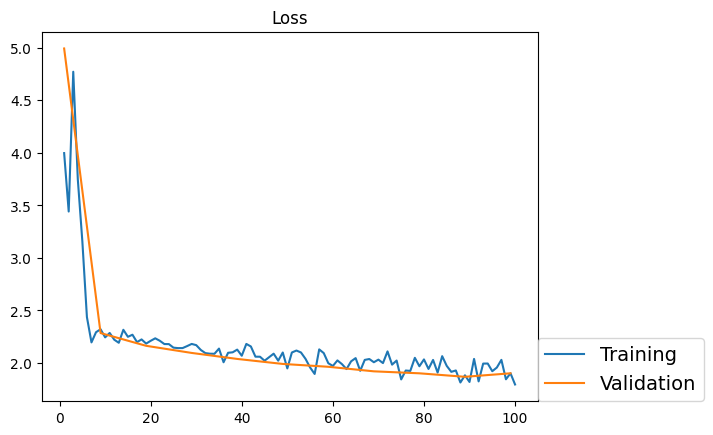

In [31]:
#SGD + Momentum
def momentum_optimizer(model):
    return optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Adagrad
def adagrad_optimizer(model):
  return optim.Adagrad(model.parameters(), lr=0.1, lr_decay=0.0, weight_decay=0.0, initial_accumulator_value=0)

# RMSProp
def rmsprop_optimizer(model):
  return optim.RMSprop(model.parameters(), lr=0.1, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

# Adam
def adam_optimizer(model):
  return optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# Train with custom optimizer (on small subset)
reset_parameters(model) # Reset network weights
train_loss_history = fit(model,opt_func=momentum_optimizer,bs=128,epochs=5,batches_per_epoch=20)

## 4. Tasks: You are free to choose any of the tasks below
The overall goal is to make the model perform as good as possible on the CIFAR 10 dataset. Solving the tasks below might help you, but feel free to try other options. For inspiration, here is a list of other things, you could do:

- **Increase the capacity of the network** (add more conv layers, add more kernels in each layer, add another fully connected layer, add more connections in the fully connected layer, etc.)
- **Experiment with weight decay** (weight decay is an option for, say, the [SGD optimizer](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD))

General recommendations for hyperparameter search:
- Stage your search from course to fine
- Start with a small sample (subset) of the dataset to tune in on hyperparameters such as learning rate, and start with 1 epoch or less
- The second stage could then perform a narrower search with more data and/or more epochs
- Search for learning rates in powers of 10. Good learning rates to try: 1e-1, 1e-2, 1e-3, 1e-4, etc.)
- **Look at loss curves!!!**


### 4.1 Implement a learning rate scheduler
**Your task** is to replace the function `base_lr_scheduler` with your own `step_decay` function (or another type of learning rate scheduler if you prefer). In step decay the lerning rate is updated for every `step` batches according to the rule `lr = lr * decay_rate`. The input `t` is the current batch index, ranging from 1 to `T`, where `T = batches_per_epoch * epochs` is the total number of batches.

Epochs: 5 Batches per epoch: 20 Total number of batches 100
t 10 lr 0.001 train loss 3.377175 val loss 2.510421 val accuracy 0.109375
t 20 lr 0.001 train loss 3.1430302 val loss 2.5119526 val accuracy 0.1171875
t 30 lr 0.001 train loss 2.8663504 val loss 2.3639946 val accuracy 0.13906251
t 40 lr 0.001 train loss 2.688708 val loss 2.2698157 val accuracy 0.184375
t 50 lr 0.0003486784401 train loss 2.526061 val loss 2.2281399 val accuracy 0.20156251
t 60 lr 0.00012157665459056936 train loss 2.4318962 val loss 2.2169929 val accuracy 0.20937501
t 70 lr 4.239115827521624e-05 train loss 2.4154024 val loss 2.2142515 val accuracy 0.2078125
t 80 lr 1.4780882941434607e-05 train loss 2.5795984 val loss 2.2136533 val accuracy 0.20625
t 90 lr 1.7970102999144344e-06 train loss 2.5122795 val loss 2.2131193 val accuracy 0.20625
t 100 lr 2.1847450052839264e-07 train loss 2.6191795 val loss 2.213298 val accuracy 0.2046875


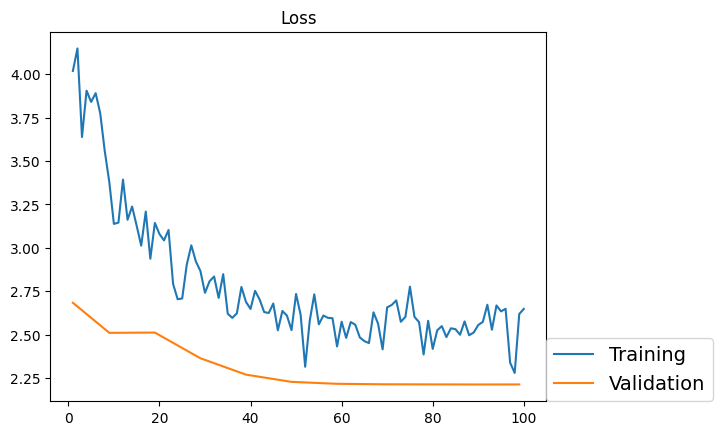

In [39]:
def step_decay(t,T,lr,step=40,decay_rate=0.9):
  # Your code goes here
  lr = lr * decay_rate ** (t // step)

  return lr


# Train
model = Net().cuda()
reset_parameters(model)
train_loss_history = fit(model,lr_scheduler=step_decay,bs=128,epochs=5,batches_per_epoch=20)


**Sub-tasks:**
- What new hyperparameters are added with learning rate decay?
- See if you can make the model perform better with learning rate decay.

### 4.2 Implement a learning rate finder
Finding a good initial learning rate can be done efficiently with a learning rate finder. Here is the basic idea:

You can modify the learning rate scheduler `base_lr_scheduler` to use a hardcoded list of learning rates. This can be used to implement a learning rate finder according to this principle:
- Start training and increase learning rate linearly after each batch (!!!), and calculate the loss
- Then display the loss as a function of learning rate.
- By manual inspection, select a suitable range of learning rates by locating the strongest downward slope.

Say the hardcoded learning rates are:

In [40]:
# Ordered list of learning rates (ascending order)
lr_list = [0.001,0.01,0.05,0.1]

Then simply implement a learning rate scheduler that returns the t´th entry of the learning rate list:

In [41]:
def lr_finder(t,T,lr):
  lr = lr_list[t-1]
  return lr

Note, the learning rate scheduler must have this interface: `(t,T,lr)`

Then train the model for as many batches as there are entries in the learning rate list:

In [42]:
# Make sure that we process as many batches as there are learning rates in our list:
batches_per_epoch = len(lr_list)
epochs = 1

# Train
model = Net().to(device)
reset_parameters(model)
train_loss_history = fit(model,lr_scheduler=lr_finder,epochs=epochs,batches_per_epoch=batches_per_epoch,show_summary=False)

Epochs: 1 Batches per epoch: 4 Total number of batches 4


Plot the loss versus learning rate and inspect:

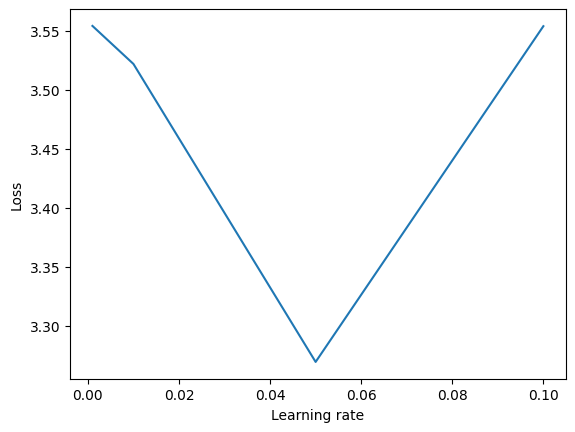

In [43]:
plt.figure()
plt.plot(lr_list,train_loss_history)
plt.xlabel('Learning rate');
plt.ylabel('Loss');
plt.show()

**Your task** is to implement a learning rate finder that searches through a range of learning rates, like above.

The range of learning rates should be logarithmic (say from 10^-6 to 10^1). You can define the list of learning rates using `np.logspace`.

Then plot the loss versus the learning rate. It is a good idea to use a logarithmic scale on the x-axis (see `plt.xscale('log')`).

[0.001      0.00112421 0.00126385 0.00142083 0.00159731 0.00179571
 0.00201876 0.00226951 0.00255141 0.00286832 0.00322459 0.00362512
 0.00407539 0.0045816  0.00515068 0.00579044 0.00650968 0.00731824
 0.00822724 0.00924915 0.01039798 0.01168952 0.01314147 0.01477378
 0.01660883 0.01867181 0.02099104 0.02359833 0.02652948 0.02982471
 0.03352924 0.03769391 0.04237587 0.04763938 0.05355667 0.06020894
 0.0676875  0.07609497 0.08554673 0.09617249 0.10811808 0.12154743
 0.13664483 0.15361749 0.17269833 0.19414919 0.21826447 0.24537511
 0.27585316 0.31011689 0.34863652 0.39194068 0.44062364 0.49535352
 0.5568814  0.62605166 0.70381356 0.79123426 0.8895135  1.        ]
Epochs: 1 Batches per epoch: 60 Total number of batches 60
t 10 lr 0.0025514065200312875 train loss 3.088619 val loss 2.4115033 val accuracy 0.13697918
t 20 lr 0.008227241341700473 train loss 2.5032392 val loss 2.230338 val accuracy 0.20937501
t 30 lr 0.026529484644318972 train loss 2.118204 val loss 2.0252347 val accuracy 0.26

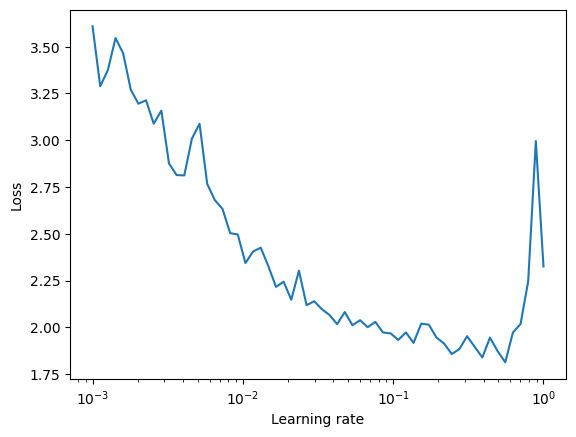

In [52]:
lr_list =  np.logspace(-3, 0, 60)# Your code goes here

batches_per_epoch = len(lr_list)
print(lr_list)

# Run
model = Net().to(device)
reset_parameters(model)
train_loss_history = fit(model,lr_scheduler=lr_finder,epochs=epochs,batches_per_epoch=batches_per_epoch,show_summary=False)
plt.figure()
plt.plot(lr_list,train_loss_history)
plt.xscale('log') # Use log scale on x-axis
plt.xlabel('Learning rate');
plt.ylabel('Loss');

**Comments: What to look for?**
The numerical value of the loss is not important. What is important is the rate of change of the loss. So what we are looking for as a range of learning rates, where the loss decreases most rapidly. That seems to be somewhere between 10^-2 and 10^-1 (look for steepest slope).

### 4.3 Experiment with dropout
Below is a slight modification of our model that allows changing the dropout fraction (p).

**Your task** is to experiment with different values of p.

- What does setting p = 0 mean?
- Try different values of p (say 0, 0.1, 0.5 and 0.9). What is the optimal value of p?

In [63]:
def Net(p=0.5):
  net = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
      nn.BatchNorm2d(num_features=6),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
      nn.BatchNorm2d(num_features=16),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      Lambda(lambda x: x.view(x.size(0), -1)), # Vectorize
      nn.Dropout(p=p),
      nn.Linear(in_features=16*5*5,out_features=120),
      nn.ReLU(),
      nn.Linear(in_features=120, out_features=10)
  )
  return net

# Model with p=0.25
model = Net(p=0.25).to(device)

Epochs: 5 Batches per epoch: 20 Total number of batches 100
t 10 lr 0.001 train loss 2.9536633 val loss 2.474192 val accuracy 0.1
t 20 lr 0.001 train loss 2.6368697 val loss 2.509982 val accuracy 0.1109375
t 30 lr 0.001 train loss 2.7311842 val loss 2.444555 val accuracy 0.1171875
t 40 lr 0.001 train loss 2.3712306 val loss 2.3394523 val accuracy 0.1578125
t 50 lr 0.001 train loss 2.2590537 val loss 2.2817295 val accuracy 0.1734375
t 60 lr 0.001 train loss 2.2459047 val loss 2.228564 val accuracy 0.1828125
t 70 lr 0.001 train loss 2.2638505 val loss 2.183194 val accuracy 0.20156251
t 80 lr 0.001 train loss 2.0941348 val loss 2.1432374 val accuracy 0.21718751
t 90 lr 0.001 train loss 2.098276 val loss 2.1106038 val accuracy 0.2109375
t 100 lr 0.001 train loss 2.0614772 val loss 2.086662 val accuracy 0.23281251


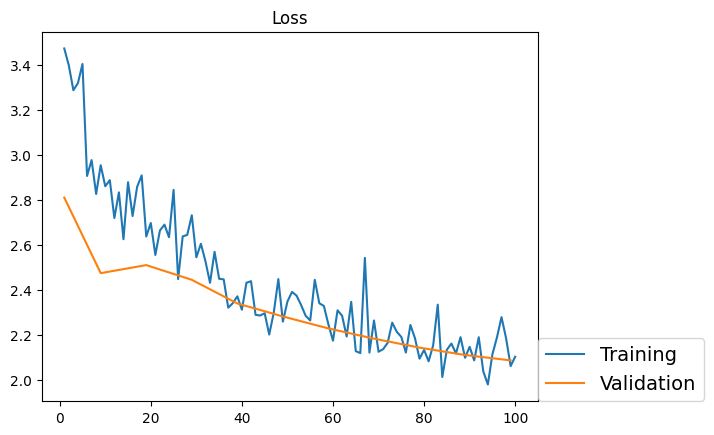

In [74]:
# p = 0 means no dropout
model = Net(p=0.2).to(device)
reset_parameters(model)
train_loss_history = fit(model,bs=128,epochs=5,batches_per_epoch=20)

### 4.4 Data augmentation
Adding more training data is the best way to improve your models abiliy to generalize to unseen data. Data augmentations is basically about generating additional *fake data" to expand the size of your training set.

**Your task** is to experiment with different types of data augmentation. All you have to do is change the transformer below and add some of the available transforms: https://pytorch.org/docs/stable/torchvision/transforms.html

You can find inspiration in Lab 4: https://github.com/aivclab/dlcourse/blob/master/Lab_4_(part3)_PyTorch_Transfer_Learning.ipynb


Files already downloaded and verified
Files already downloaded and verified
images.shape torch.Size([64, 3, 32, 32])


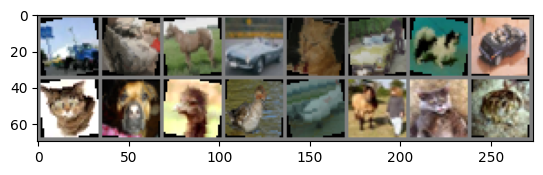

truck   car horse   car   cat   car   dog   car   cat   dog  bird  bird plane horse   cat  frog


In [80]:
mean = 0.5
std = 0.5
transform = transforms.Compose(
    [ # YOUR CODE GOES HERE
      #Augment data
      transforms.RandomHorizontalFlip(p=0.5),
      #transforms.RandomCrop(32, padding=4),
      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
      transforms.RandomRotation(degrees=15),
      transforms.ToTensor(),
      transforms.Normalize((mean, mean, mean), (std, std, std))
     ])

# Batch size
bs = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=2,drop_last=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False, num_workers=2,drop_last=True)

# Get a batch of some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print('images.shape',images.shape)

# show 10 images and print labels
imshow(torchvision.utils.make_grid(images[0:16]))
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

Epochs: 5 Batches per epoch: 20 Total number of batches 100
t 10 lr 0.001 train loss 7.72552 val loss 2.5439515 val accuracy 0.078125
t 20 lr 0.001 train loss 6.7412415 val loss 2.5752542 val accuracy 0.0859375
t 30 lr 0.001 train loss 5.3445215 val loss 2.4649377 val accuracy 0.11875
t 40 lr 0.001 train loss 4.638682 val loss 2.3808553 val accuracy 0.121875
t 50 lr 0.001 train loss 4.2761807 val loss 2.301457 val accuracy 0.11875
t 60 lr 0.001 train loss 3.7235987 val loss 2.2873049 val accuracy 0.140625
t 70 lr 0.001 train loss 3.7226546 val loss 2.2488458 val accuracy 0.1671875
t 80 lr 0.001 train loss 3.30872 val loss 2.228439 val accuracy 0.1484375
t 90 lr 0.001 train loss 3.0723226 val loss 2.2366438 val accuracy 0.15468751
t 100 lr 0.001 train loss 3.1964583 val loss 2.2339764 val accuracy 0.1640625


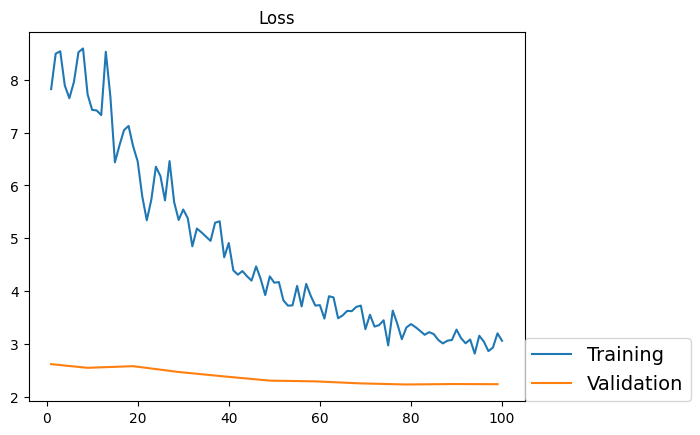

In [81]:
# Train
model = Net().to(device)
reset_parameters(model)
train_loss_history = fit(model,bs=128,epochs=5,batches_per_epoch=20)